In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
insurance_df = pd.read_csv('insurance.csv')
df = insurance_df.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df['sex'] = df['sex'].astype('category')
df['children'] = df['children'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

**Examine the distribution of Bmi**

30.66339686098655
30.4


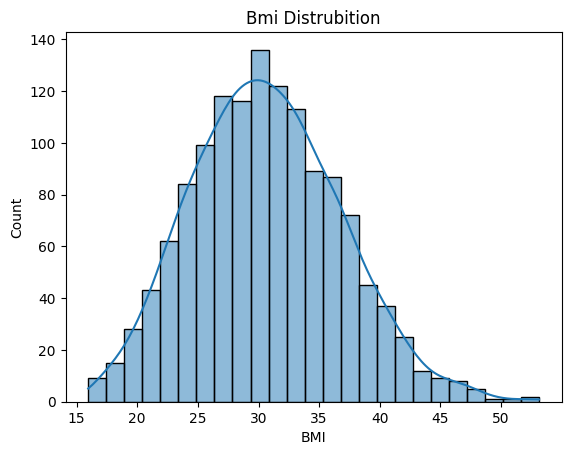

In [ ]:
sns.histplot(data=df, x = 'bmi', kde = True)
plt.title('Bmi Distrubition')
plt.xlabel('BMI')
print(df.bmi.mean())
print(df.bmi.median())

**Examine the relationship between “smoker” and “charges”**
<br>
The graph shows that smokers generally have higher costs than non-smokers.

<Axes: xlabel='smoker', ylabel='charges'>

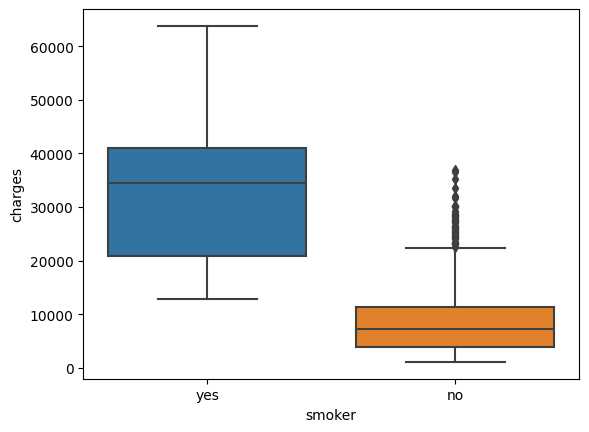

In [ ]:
sns.boxplot(data=df, x='smoker', y='charges')

**Examine the relationship between “smoker” and “region”**
<br>
The graph shows that patients generally have not smoke and most smoker region is southeast.

<Axes: xlabel='region', ylabel='count'>

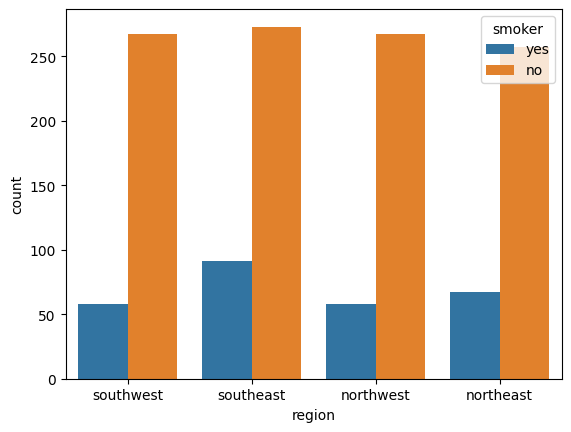

In [ ]:
sns.countplot(data = df, x = 'region', hue = 'smoker')

**Examine the relationship between “bmi” and “sex”**
<br>
Even if there are outliers, the bmi values ​​are generally in the same range.

<Axes: xlabel='sex', ylabel='bmi'>

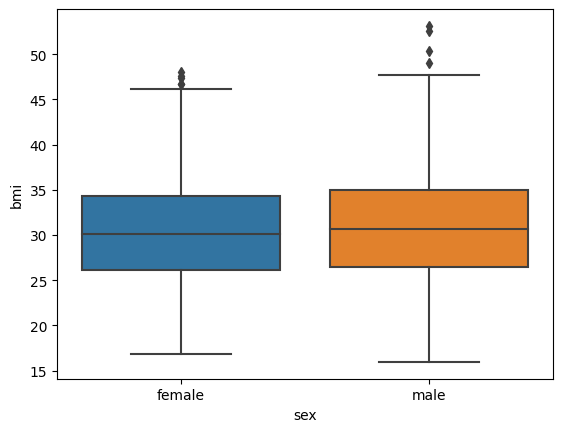

In [ ]:
sns.boxplot(data=df, x='sex', y='bmi')

**Find the "region" with the most "children"**

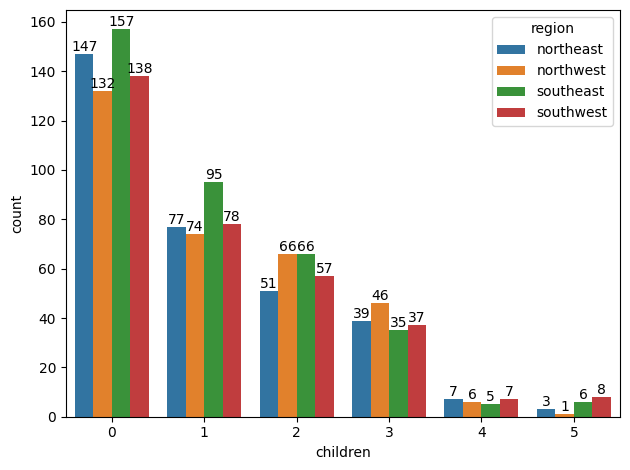

In [ ]:
ax = sns.countplot(data=df, x="children", hue="region")
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.subplots_adjust(hspace=0.50,wspace = 0.50)

In [ ]:
df.groupby(df['region'])['children'].sum()

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

**Examine the relationship between “age” and “bmi”**<br>
There is a slight increase in BMI values ​​with age.

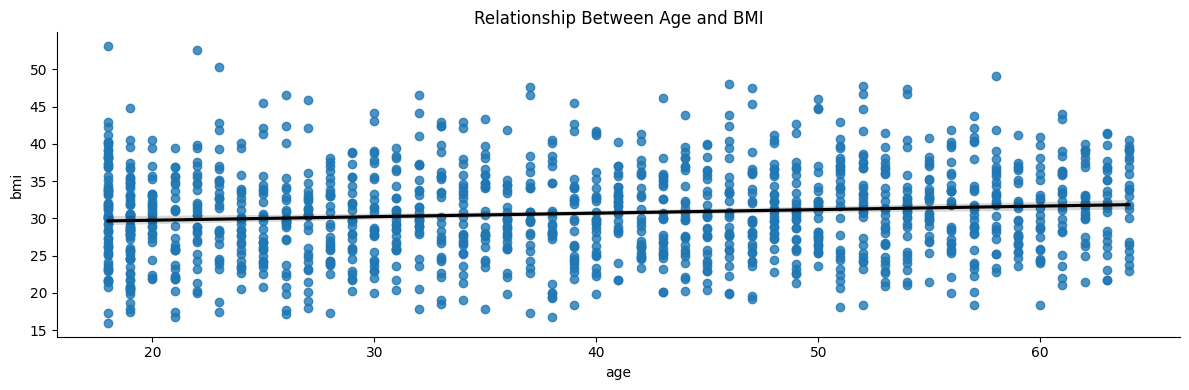

In [ ]:
sns.lmplot(x='age', y="bmi", data=df, line_kws={'color': 'black'}, height = 4, aspect = 3)
plt.title('Relationship Between Age and BMI')
plt.xlabel('age')
plt.ylabel('bmi')
plt.tight_layout()

**Examine the relationship between “bmi” and “children”**<br>
The most stable BMI values ​​appear in those with 4 children.

<Axes: xlabel='children', ylabel='bmi'>

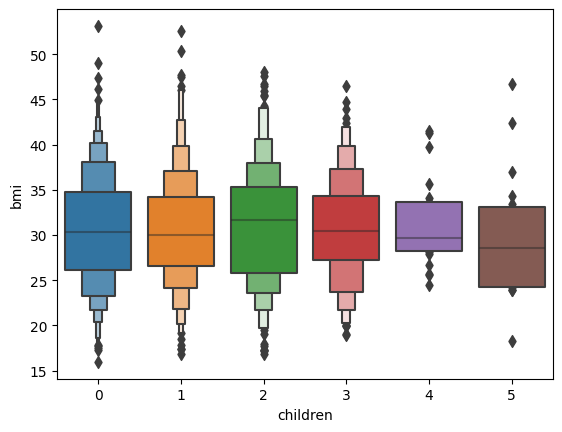

In [ ]:
sns.boxenplot(data = df, x = 'children', y = 'bmi')

**Visualize Bmi outliers**
<br>
It is seen that bmi value greater than 45 are outliers.

<Axes: >

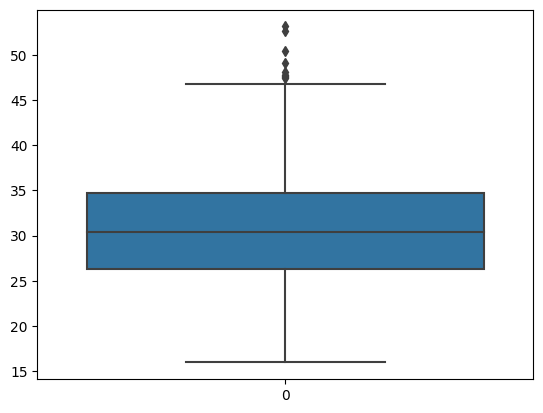

In [ ]:
sns.boxplot(data=df['bmi'])

**Examine the relationship between “bmi” and “charges”**
<br>
Who are have bigger than 30 body-mass index, it is seen that the charges are increasing.

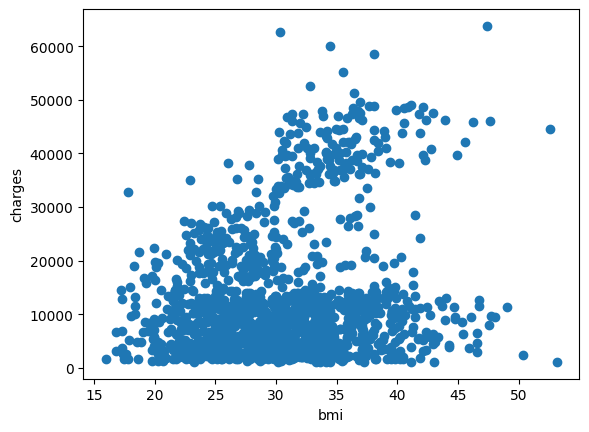

In [ ]:
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

**Examine the relationship between “region”, “smoker” and “bmi” using bar plot**
<br>
It is seen that independent with smoker southeast region have most big bmi.

<Axes: xlabel='smoker', ylabel='bmi'>

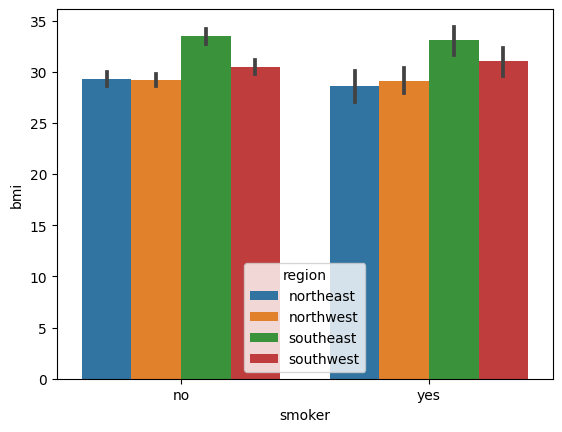

In [ ]:
sns.barplot(x="smoker", y="bmi", hue="region",data=df)

# **Data Preprocessing**

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

lower bound:  13.7 	upper bound:  47.290000000000006


<Axes: xlabel='bmi'>

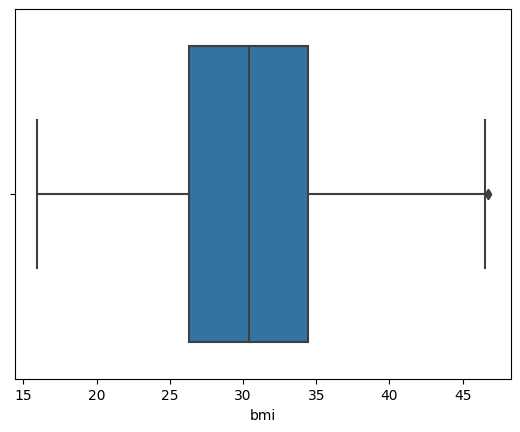

In [9]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR
print("lower bound: ", lower_bound, "\tupper bound: ", upper_bound)
outliers_vector = (df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)
outliers = df['bmi'][outliers_vector]
outliers.index
df['bmi'][outliers_vector] = df['bmi'].mean()
sns.boxplot(x="bmi",data=df)

In [10]:
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df['smoker'] = encoder.fit_transform(df['smoker'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [11]:
ohe = (OneHotEncoder(sparse_output=False).set_output(transform="pandas"))
region = ohe.fit_transform(df[['region']])
region.columns = ohe.get_feature_names_out()
region = region.drop(columns='region_southeast')
region.head()

,region_northeast,region_northwest,region_southwest
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [12]:
df = df.drop(columns='region')
df = pd.concat([df, region], axis=1)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0


In [13]:
y = df.iloc[:, 5:6]
X = df.drop("charges",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test))
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southwest
560,0.608696,0.0,0.129798,0.4,0.0,0.0,1.0,0.0
1285,0.630435,0.0,0.271958,0.0,0.0,1.0,0.0,0.0
1142,0.739130,0.0,0.289525,0.0,0.0,0.0,0.0,0.0
969,0.456522,0.0,0.597267,1.0,0.0,0.0,0.0,0.0
486,0.782609,0.0,0.179245,0.6,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1095,0.000000,0.0,0.500651,0.8,0.0,1.0,0.0,0.0
1130,0.456522,0.0,0.257319,1.0,0.0,0.0,0.0,0.0
1294,0.869565,1.0,0.299772,0.0,0.0,1.0,0.0,0.0
860,0.413043,0.0,0.478315,0.4,1.0,0.0,0.0,1.0


# **Model Selection**

In [15]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

linear = LinearRegression()
ridge = Ridge()
rfr = RandomForestRegressor()
mlp = MLPRegressor()

scores_linear = cross_val_score(linear, X, y, cv=5)
scores_ridge = cross_val_score(ridge, X, y, cv=5)
scores_rfr = cross_val_score(rfr, X, y, cv=5)
scores_mlp = cross_val_score(mlp, X, y, cv=5)

print("---cross_val_score---")
print("Linear: %0.2f accuracy with a standard deviation of %0.2f" % (scores_linear.mean(), scores_linear.std()))
print("Ridge: %0.2f accuracy with a standard deviation of %0.2f" % (scores_ridge.mean(), scores_ridge.std()))
print("RFR: %0.2f accuracy with a standard deviation of %0.2f" % (scores_rfr.mean(), scores_rfr.std()))
print("MLP: %0.2f accuracy with a standard deviation of %0.2f" % (scores_mlp.mean(), scores_mlp.std()))

---cross_val_score---
Linear: 0.75 accuracy with a standard deviation of 0.02
Ridge: 0.75 accuracy with a standard deviation of 0.02
RFR: 0.83 accuracy with a standard deviation of 0.03
MLP: -0.01 accuracy with a standard deviation of 0.06


# **Hyper-parameter Optimization**

In [18]:
from sklearn.model_selection import GridSearchCV

# n_estimators = number of trees in the foreset
# max_features = max number of features considered for splitting a node
# max_depth    = max number of levels in each decision tree
# min_samples_split = min number of data points placed in a node before the node is split
# min_samples_leaf  = min number of data points allowed in a leaf node
# bootstrap         = method for sampling data points (with or without replacement)

forest_params = [{'bootstrap': [True, False],
 'max_depth': [5, 10, 15, 20, 25, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500]}]
clf = GridSearchCV(rfr, forest_params, cv = 10, scoring='r2')
clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
0.8490988100105508


# **Model Evaluation**

In [19]:
from sklearn.metrics import mean_squared_error

optimized_rfr = RandomForestRegressor(
    bootstrap=clf.best_params_['bootstrap'],
    max_depth=clf.best_params_['max_depth'],
    max_features=clf.best_params_['max_features'],
    min_samples_leaf=clf.best_params_['min_samples_leaf'],
    min_samples_split=clf.best_params_['min_samples_split'],
    n_estimators=clf.best_params_['n_estimators']
)
optimized_rfr.fit(X_train, y_train)

print("MSE: ", mean_squared_error(y_test, optimized_rfr.predict(X_test)))
print("R2: ", r2_score(y_test, optimized_rfr.predict(X_test)))

MSE:  19499384.958969466
R2:  0.8743990706294259
